# Ablación térmica
El procedimiento de ablación térmica se utiliza para destruir un tumor mediante la aplicación de calor a través de un instrumento que alcanza una temperatura de 800 K en la superficiente de contacto con el tejido. El instrumento tiene forma esférica con radio $R = 0,001m$ y se aplica calor durante 10 minutos. El tejido biológico afectado tiene una densidad $\rho = 985 \frac{Kg}{m^3}$, un calor específico $C_p = 3500 \frac{J}{Kg \times K}$ y una conductividad térmica $K = 0,6 \frac{W}{m \times K}$. Determine:
  1. La curva de densidad espectral de potencia emitida por el instrumento en el interior del cuerpo.
  2. La potencia total emitida por la superficie del instrumento.
  3. Considere que algunos átomos del tejido tienen una función de trabajo de 4 eV. Determine que porcentaje de la potencia radiada por el  instrumento puede provocar ionización de los átomos del tejido.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-3-5d0f869242be>:11: RuntimeWarning: overflow encountered in exp
  den = a / ((wave**5) * (np.exp(b) - 1))


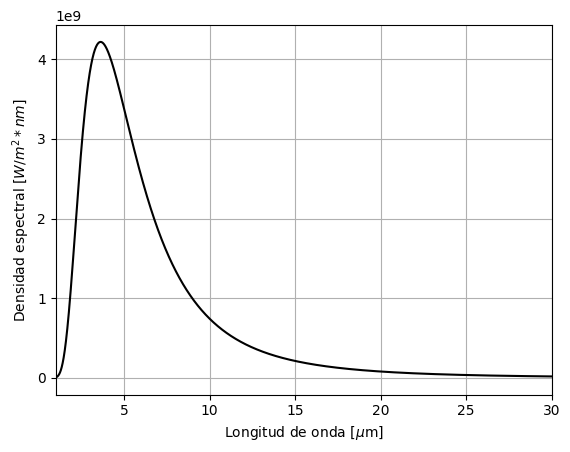

La potencia total emitida por unidad de área es de 23225.853512801008 W/m^2, para una potencia total emitida por la superficie de 0.29186468307667335W
La potencia ionizante es del 99.99999999999977%


In [3]:
h = 6.62607015E-34 # en J*s
#h = 4.13566743E-15 # en eV*s
c =  299792458 # en m/s
kb = 1.380649E-23 # en J/K
#kb = 8.617333262E-5 # en ev/K
stf = 5.670373E-8 #en W/m^2K^4

def planck_den(temp,wave):
  a = 2*h*np.pi*(c**2)
  b = h*c/(wave*kb*T)
  den = a / ((wave**5) * (np.exp(b) - 1))
  return den

T = 800 # en K
dens = 985
R = 0.001
area_sup = 4*np.pi*(R**2)

wavelengths = np.arange(1E-9, 4E-3, 1E-9) # Paso de 1nm
spct_den = planck_den(T, wavelengths)

plt.plot(wavelengths*1E6, spct_den, color="black")
plt.xlim(1, 30)
plt.grid()
plt.xlabel("Longitud de onda [$\mu$m]")
plt.ylabel("Densidad espectral [$W /m^2*nm$]")
plt.show()

pot_area = np.sum(spct_den[:-1] * np.diff(wavelengths))
pot_ion = np.sum(spct_den[310:-1] * np.diff(wavelengths[310:]))
porcent_ion = pot_ion / pot_area * 100
p_total = pot_area * area_sup
print(f"La potencia total emitida por unidad de área es de {pot_area} W/m^2, para una potencia total emitida por la superficie de {p_total}W")
print(f"La potencia ionizante es del {porcent_ion}%")